In [295]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [296]:
%matplotlib inline

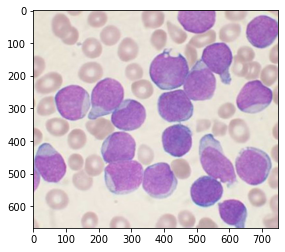

In [309]:
cvimg = cv2.imread('dataset/train/img-5.jpg')
rgbimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

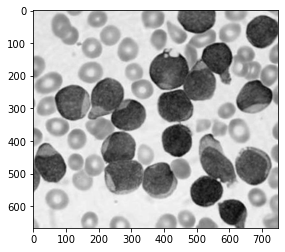

In [310]:
gsimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gsimg, 'gray')

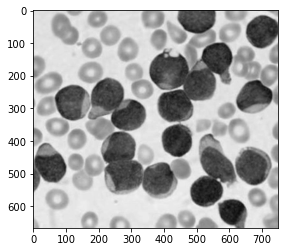

In [311]:
greenimg = cvimg[:,:,1].astype('float64')
greenimg *= (255.0/greenimg.max())
greenimg = greenimg.astype('uint8')
plt.imshow(greenimg, 'gray')

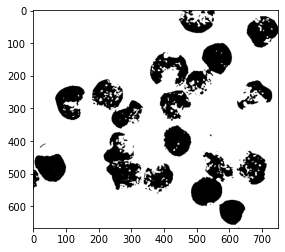

In [333]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 62)
plt.imshow(adabingreenimg, 'gray')

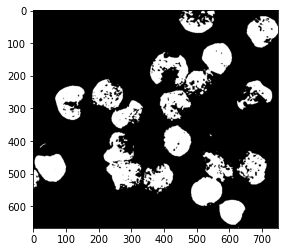

In [334]:
invadabingreenimg = 255-adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

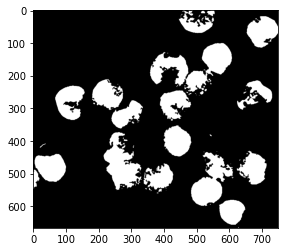

In [335]:
img, contours, hierarchy = cv2.findContours(invadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.fillPoly(invadabingreenimg, pts=[contour], color=255)
plt.imshow(invadabingreenimg, 'gray')

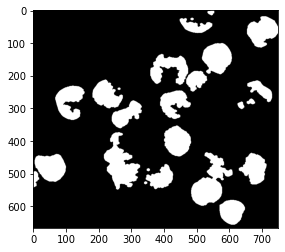

In [336]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
oinvadabingreenimg = cv2.morphologyEx(invadabingreenimg,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(oinvadabingreenimg, 'gray')

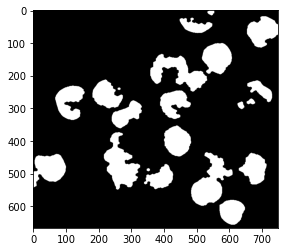

In [337]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
coinvadabingreenimg = cv2.morphologyEx(oinvadabingreenimg,cv2.MORPH_CLOSE,kernel, iterations = 2)
plt.imshow(coinvadabingreenimg, 'gray')

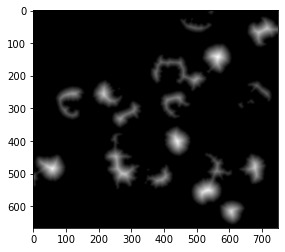

In [338]:
dtcoinvadabingreenimg = cv2.distanceTransform(coinvadabingreenimg,cv2.DIST_L2,5)
plt.imshow(dtcoinvadabingreenimg, 'gray')

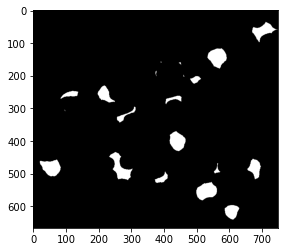

In [339]:
_, temp = cv2.threshold(dtcoinvadabingreenimg,0.4*dtcoinvadabingreenimg.max(),255,0)
defwhitecells = np.uint8(temp)
plt.imshow(defwhitecells, 'gray')

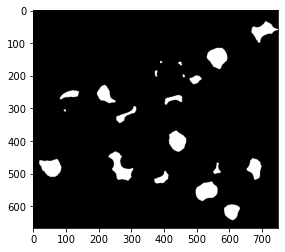

In [340]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
whitecells = cv2.dilate(defwhitecells, kernel, iterations=1)
plt.imshow(whitecells, 'gray')

In [332]:
_, whitecellscontours, _ = cv2.findContours(whitecells, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(whitecellscontours))

18


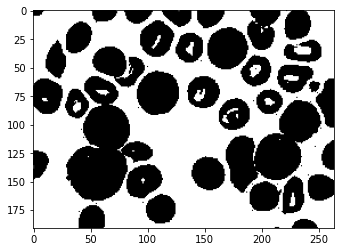

In [219]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 0)
plt.imshow(adabingreenimg, 'gray')

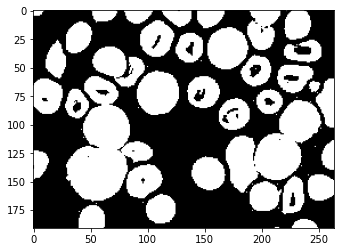

In [220]:
invadabingreenimg = 255 - adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

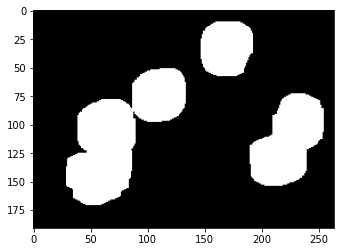

In [221]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
surewhitecells = cv2.dilate(coinvadabingreenimg, kernel, iterations=3)
plt.imshow(surewhitecells, 'gray')

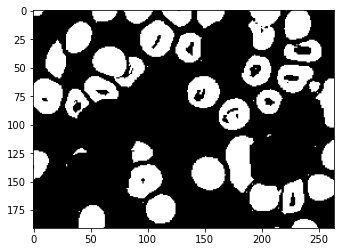

In [223]:
redinvadabingreenimg = cv2.subtract(invadabingreenimg, surewhitecells)
plt.imshow(redinvadabingreenimg, 'gray')

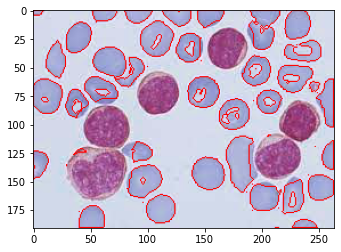

In [285]:
img, contours, hierarchy = cv2.findContours(redinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = cvimg.copy()
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
plt.imshow(img, 'gray')

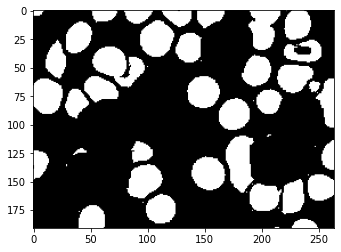

In [287]:
for contour in contours:
    cv2.fillPoly(redinvadabingreenimg, pts =[contour], color=255)
plt.imshow(redinvadabingreenimg, 'gray')

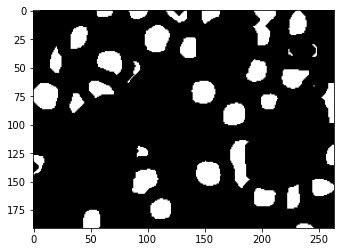

In [288]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
erodedredinvadabingreenimg = cv2.erode(redinvadabingreenimg, kernel, iterations=4)
plt.imshow(erodedredinvadabingreenimg, 'gray')

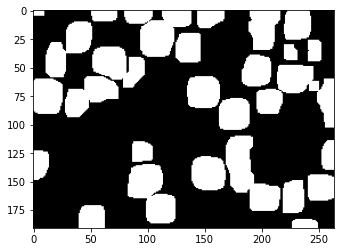

In [289]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilatederodedredinvadabingreenimg = cv2.dilate(erodedredinvadabingreenimg, kernel, iterations=2)
plt.imshow(dilatederodedredinvadabingreenimg, 'gray')

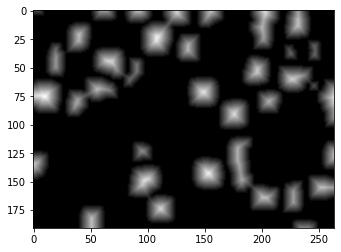

In [290]:
dtdilatederodedredinvadabingreenimg = cv2.distanceTransform(dilatederodedredinvadabingreenimg,cv2.DIST_L2,5)
plt.imshow(dtdilatederodedredinvadabingreenimg, 'gray')

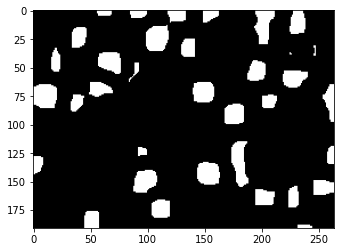

In [291]:
_, temp = cv2.threshold(dtdilatederodedredinvadabingreenimg,0.35*dtdilatederodedredinvadabingreenimg.max(),255,0)
defredcells = np.uint8(temp)
plt.imshow(defredcells, 'gray')

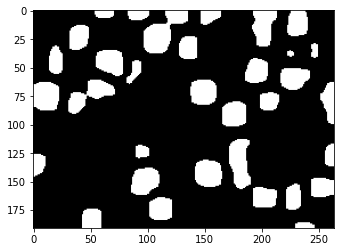

In [292]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
redcells = cv2.dilate(defredcells, kernel, iterations=1)
plt.imshow(redcells, 'gray')

In [293]:
_, redcellscontours, _ = cv2.findContours(redcells, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(redcellscontours))

33
